## Sci-Kit Learn: Image Classification - Predicting Digits - Stocastic Gradient Descent (SGD)

John Ryan - 18 May 2017

### Digit Recognition - MNIST dataset

Dataset containing 70,000 small images of handwritten digits.


### Contents

Step 1:

- Preprocessing data

- Stocastic Gradient Descent binary classifier

- K-fold Cross Validation


**What is Stocastic Gradient Descent?**

It is a stochastic approximation of the gradient descent optimization algorithm for minimizing an objective function that is written as a sum of differentiable functions. It has the advantage of working on instances individually, one at a time which makes it highly efficent on large data sets. SGD picks a random instance in the raining set at every step and computes its gradients based only on the individual instance selected.

### 1. Fetching Digit Images

In [2]:
#Import the dataset with a helper function from the sklearn machine learning dataset store
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
#creating an X and Y variable to hold the data for training purposes later
X, y = mnist["data"], mnist["target"]
X.shape

(70000L, 784L)

### 2. Preprocessing the images

#### Train/Test Split

- The dataset used for this example is already split into a training and test set using the first 60,000 images as a training set and the final 10,000 as the test set. Therefore we will not perform a normal train test split on the data. 

#### Shuffling

- With image data that comes from different sources it is sometimes important to shuffle the dataset to get an even representation across the training and test set to remove any possibly of the model training on data that comes from one specific source.The obvious exception to this with data that has an ordering or time sequence.

The shuffle will make sure that later in the cross validation stage the folds wont be non-similier and match in size. 

In [5]:
#Shuffle the dataset across training and test sets
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[:60000],y[:60000], y[:60000]
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle], y_train[shuffle]

#### Training the Classification Model

In [6]:
#Creates the target training & test set with just digit 4 binary target: 4 = True, other = False
digit = X[6000]
y_train4 = (y_train == 4)
y_test4 = (y_train == 4)
y_train4

array([False, False, False, ..., False, False, False], dtype=bool)

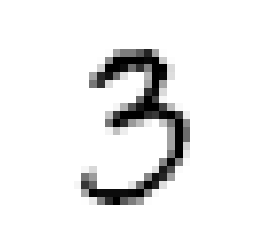

In [9]:
#import the plotting libaries and imshow to display the 29,000 image picked at random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
digit = X[20000]
digit_im = digit.reshape(28,28)
plt.imshow(digit_im, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

### 3. Build Basic Classifier

In [6]:
#Create the SGD classifier, as the SGD relies on the randomness of the data
#we need set a random state
from sklearn.linear_model import SGDClassifier
sgdmodel = SGDClassifier(random_state=60)
sgdmodel.fit(X_train,y_train4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=60, shuffle=True, verbose=0,
       warm_start=False)

### 3.1 Prediction of the digit 4

In [7]:
#Call the predict function to identify if the digit is a 4, 
#true below indicates that it is.
sgdmodel.predict([digit])

array([ True], dtype=bool)

### 4 Evaluating Model Performance

##### 4.1. Cross-validation - Kfold 

##### What is KFold Cross - Validation?

This means splitting the data into a number of folds specified to get a maximum prediction, in this we used 3.K fold cross validation will make prediction and evaluate a model performance on each fold using a model that has been trained on the other remaining folds.


In [8]:
#this outputs a validation score using 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgdmodel,X_train, y_train4, cv=3, scoring='accuracy')

array([ 0.97315134,  0.9791    ,  0.96094805])

In [9]:
#this outputs a validation score using 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgdmodel,X_train, y_train4, cv=10, scoring='accuracy')

array([ 0.96850525,  0.95884019,  0.97816667,  0.97566667,  0.97333333,
        0.94433333,  0.9775    ,  0.961     ,  0.97549592,  0.97832972])

We see strong results for the cross validation scores on the 3 folds, indicating a 97% accuracy which you would expect for a simple classifer that classifies that every image is not a 4.